In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [3]:
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

In [4]:
x_train = x_train.reshape((-1, 28, 28, 1))
x_test = x_test.reshape((-1, 28, 28, 1))

In [5]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [6]:
# Define CNN model
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [7]:
# Compile model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

Epoch 1/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 53s 113ms/step - accuracy: 0.9977 - loss: 0.0074 - val_accuracy: 0.9915 - val_loss: 0.0348
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 46s 98ms/step - accuracy: 0.9979 - loss: 0.0064 - val_accuracy: 0.9911 - val_loss: 0.0334
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 83s 101ms/step - accuracy: 0.9963 - loss: 0.0095 - val_accuracy: 0.9918 - val_loss: 0.0325
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 81s 99ms/step - accuracy: 0.9976 - loss: 0.0074 - val_accuracy: 0.9932 - val_loss: 0.0293
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 47s 101ms/step - accuracy: 0.9981 - loss: 0.0062 - val_accuracy: 0.9919 - val_loss: 0.0303
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 81s 99ms/step - accuracy: 0.9987 - loss: 0.0040 - val_accuracy: 0.9923 - val_loss: 0.0297
Epoch 7/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 82s 100ms/step - accuracy: 0.9990 - loss: 0.0034 - val_accuracy: 0.9925 - val_loss: 0.0329
Epoch 8/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 47s 100ms/step - accuracy: 0.9983 - loss: 0.00

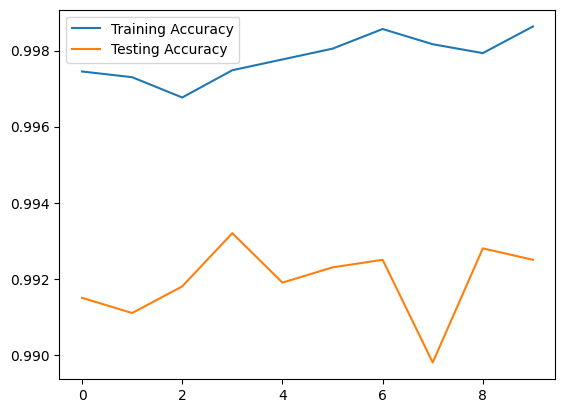

In [11]:
# Train model and store the training history
history = model.fit(x_train, y_train, epochs=10, batch_size=128, validation_data=(x_test, y_test))

# Evaluate model
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f'Test accuracy: {test_acc:.2f}')

# Plot training and testing accuracy
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Testing Accuracy')
plt.legend()
plt.show()

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step


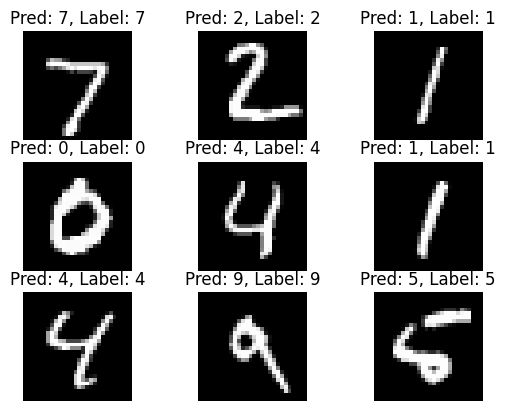

In [12]:
# Make predictions
predictions = model.predict(x_test)

# Visualize predictions
import matplotlib.pyplot as plt

for i in range(9):
    img = x_test[i].reshape((28, 28))
    pred = np.argmax(predictions[i])
    label = np.argmax(y_test[i])
    plt.subplot(3, 3, i+1)
    plt.imshow(img, cmap='gray')
    plt.title(f'Pred: {pred}, Label: {label}')
    plt.axis('off')

plt.show()

In [13]:
# Save model
model.save('mnist_cnn_model.h5')

In [15]:
# Load model
from tensorflow.keras.models import load_model
loaded_model = load_model('mnist_cnn_model.h5')

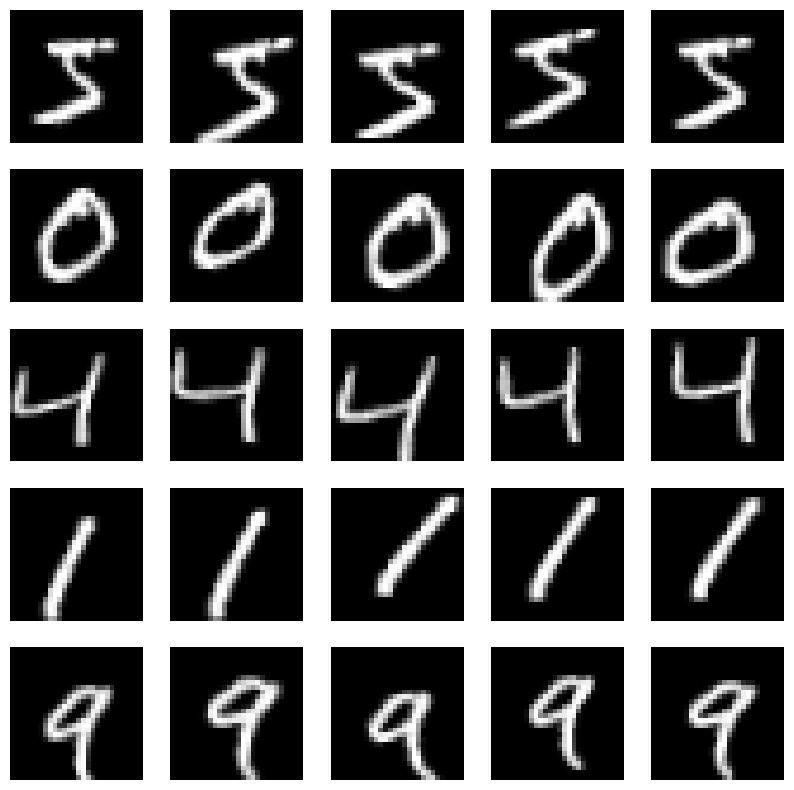

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define data augmentation parameters
datagen = ImageDataGenerator(
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=10,
    zoom_range=0.1
)

# Apply data augmentation
augmented_images = []
for img in x_train:
    # Add channel dimension
    img = img.reshape((28, 28, 1))

    # Generate 5 augmented images per original image
    for _ in range(5):
        augmented_img = datagen.random_transform(img)
        augmented_images.append(augmented_img.reshape((28, 28)))

# Visualize augmented images
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.imshow(augmented_images[i], cmap='gray')
    plt.axis('off')
plt.show()

In [24]:
# Reshape augmented images to fit model input
augmented_x_train = np.array(augmented_images).reshape((-1, 28, 28, 1))

# Repeat y_train to match augmented dataset size
y_train_repeated = np.repeat(y_train, 5, axis=0)  # Repeat along rows

# Combine original and augmented datasets
x_train_augmented = np.concatenate((x_train, augmented_x_train))
y_train_augmented = np.concatenate((y_train, y_train_repeated))

# Ensure shapes are fully defined
x_train_augmented = x_train_augmented.astype('float32')
y_train_augmented = y_train_augmented.astype('float32')

# Retrain model
model.fit(x_train_augmented, y_train_augmented, epochs=10, batch_size=128,
          validation_data=(x_test.astype('float32'), y_test))

Epoch 1/10
2813/2813 ━━━━━━━━━━━━━━━━━━━━ 265s 94ms/step - accuracy: 0.9798 - loss: 0.0663 - val_accuracy: 0.9933 - val_loss: 0.0222
Epoch 2/10
2813/2813 ━━━━━━━━━━━━━━━━━━━━ 322s 94ms/step - accuracy: 0.9932 - loss: 0.0217 - val_accuracy: 0.9945 - val_loss: 0.0178
Epoch 3/10
2813/2813 ━━━━━━━━━━━━━━━━━━━━ 321s 94ms/step - accuracy: 0.9948 - loss: 0.0158 - val_accuracy: 0.9941 - val_loss: 0.0216
Epoch 4/10
2813/2813 ━━━━━━━━━━━━━━━━━━━━ 264s 94ms/step - accuracy: 0.9961 - loss: 0.0119 - val_accuracy: 0.9952 - val_loss: 0.0200
Epoch 5/10
2813/2813 ━━━━━━━━━━━━━━━━━━━━ 322s 94ms/step - accuracy: 0.9969 - loss: 0.0092 - val_accuracy: 0.9942 - val_loss: 0.0260
Epoch 6/10
2813/2813 ━━━━━━━━━━━━━━━━━━━━ 266s 95ms/step - accuracy: 0.9974 - loss: 0.0079 - val_accuracy: 0.9944 - val_loss: 0.0238
Epoch 7/10
2813/2813 ━━━━━━━━━━━━━━━━━━━━ 321s 94ms/step - accuracy: 0.9977 - loss: 0.0070 - val_accuracy: 0.9939 - val_loss: 0.0283
Epoch 8/10
2813/2813 ━━━━━━━━━━━━━━━━━━━━ 325s 95ms/step - accuracy: 

In [25]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f'Test Accuracy: {test_acc:.2f}')

313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step - accuracy: 0.9913 - loss: 0.0383
Test Accuracy: 0.99


313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 18ms/step


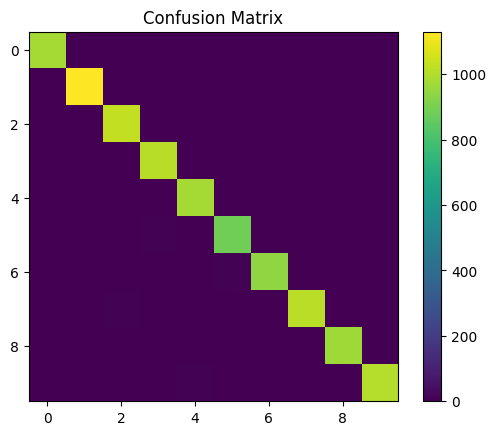

In [26]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

y_pred = model.predict(x_test)
y_pred_class = np.argmax(y_pred, axis=1)
cm = confusion_matrix(np.argmax(y_test, axis=1), y_pred_class)

plt.imshow(cm, interpolation='nearest')
plt.title('Confusion Matrix')
plt.colorbar()
plt.show()

In [27]:
from sklearn.metrics import classification_report

y_pred = model.predict(x_test)
y_pred_class = np.argmax(y_pred, axis=1)

print(classification_report(np.argmax(y_test, axis=1), y_pred_class))

313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 20ms/step
              precision    recall  f1-score   support

           0       0.99      1.00      1.00       980
           1       0.99      1.00      0.99      1135
           2       0.99      1.00      0.99      1032
           3       0.99      1.00      0.99      1010
           4       0.99      1.00      0.99       982
           5       0.99      0.99      0.99       892
           6       1.00      0.98      0.99       958
           7       1.00      0.99      0.99      1028
           8       1.00      0.99      1.00       974
           9       0.99      0.99      0.99      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



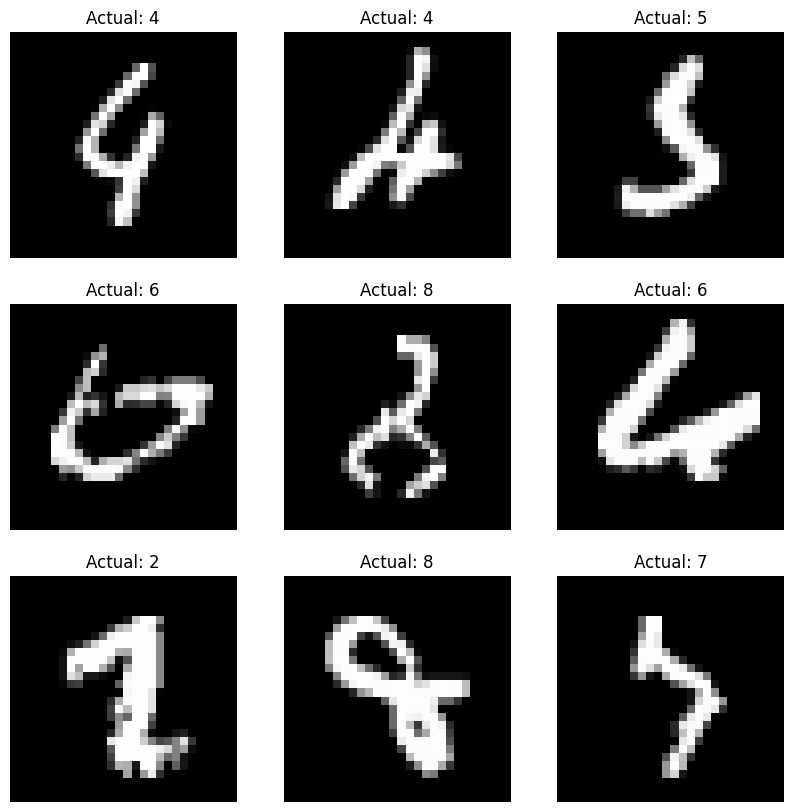

In [28]:
import matplotlib.pyplot as plt

# Plot misclassified samples
misclassified_idx = np.where(np.argmax(y_test, axis=1) != y_pred_class)[0]
plt.figure(figsize=(10, 10))
for i in range(9):
    plt.subplot(3, 3, i+1)
    plt.imshow(x_test[misclassified_idx[i]].reshape((28, 28)), cmap='gray')
    plt.title(f'Actual: {np.argmax(y_test[misclassified_idx[i]], axis=0)}')
    plt.axis('off')
plt.show()

In [29]:
model.save('handwritten_digit_recognition_model.h5')

In [30]:
from tensorflow.keras.models import load_model

loaded_model = load_model('handwritten_digit_recognition_model.h5')